# import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
#개인이 갖고 있는 파일 불러와주세요!
amazon = pd.read_csv('./AmazonFoodCategory Dataset.csv')

-데이터전처리

In [3]:
amazon = amazon[amazon['Discount Amount'] >=0]
amazon = amazon[amazon['Sales Price'] > 0]
amazon = amazon[amazon['Sales Quantity'] > 0]
amazon.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon = amazon[amazon['Sales Cost Amount'] > 0]
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

In [4]:
# 날짜 필터링 

start_date= '2017-01-01'
end_date= '2018-03-21'

amazon['DateKey'] = pd.to_datetime(amazon['DateKey'], format= '%m/%d/%Y')
amazon = amazon[(amazon['DateKey'] >=start_date) & (amazon['DateKey'] <= end_date)]
# sorted(amazon['DateKey'].unique())

amazon.info()
amazon.head(3)


<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M
28021,10008602,2018-03-21,439.2400,226437,Tell Tale Summer Squash,195.0000,535.76,975.0000,372.26,163.50,107.152000,5,EA
28022,10008602,2018-03-21,1517.3076,226437,Nationeel Avocado Dip,842.0244,1850.79,3368.0976,1256.20,594.59,462.697500,4,EA
28023,10014779,2018-03-21,192.4900,226451,Super White Sugar,157.7600,280.79,473.2800,143.73,137.06,93.596667,3,SE


In [5]:
temp= amazon['Custkey'].value_counts()
print(len(temp[temp > 1]))
# 34292 개의 Custkey 데이터 중에 중복구매한 사용자 수 482
print(len(temp[temp==1]))
# 1인 사람 41개
print(len(temp))

487
42
529


In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

In [7]:
print('총 매출: ', round(amazon['Sales Amount'].sum(), 2))
print('총 할인 금액: ', round(amazon['Discount Amount'].sum(), 2))

총 매출:  96803974.11
총 할인 금액:  69436945.25


# 고객별 Sales Amount

In [8]:
cust_m= amazon.groupby('Custkey')['Sales Amount'].sum().reset_index()

cust_m.sort_values(by= 'Sales Amount', ascending= False)

,Custkey,Sales Amount
343,10021485,10949474.37
432,10025024,7951267.71
443,10025052,5419724.38
440,10025039,3259962.46
489,10025919,3250786.04
...,...,...
491,10026009,224.55
272,10019812,221.04
427,10024924,216.33
169,10013039,216.20


In [9]:
# R, F

cust_rf = amazon.groupby('Custkey').agg(
    Last_Purchase=('DateKey', 'max')
    , Frequency=('Invoice Number', 'count') 
).reset_index()

cust_rf

,Custkey,Last_Purchase,Frequency
0,10000453,2017-01-06,10
1,10000455,2017-11-04,19
2,10000456,2017-12-04,23
3,10000457,2017-12-01,3
4,10000458,2018-03-06,4
...,...,...,...
524,10027381,2018-03-14,108
525,10027560,2017-12-26,42
526,10027572,2018-03-20,45
527,10027575,2018-03-06,5


# RFM 523개

In [10]:
cust_rfm= cust_rf.merge(cust_m, on= 'Custkey')

cust_rfm= cust_rfm.rename(columns= {'Last_Purchase': 'Recency',
                          'Sales Amount': 'Monetary'})

In [11]:
cust_rfm.info()
cust_rfm.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Custkey    529 non-null    int64         
 1   Recency    529 non-null    datetime64[ns]
 2   Frequency  529 non-null    int64         
 3   Monetary   529 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 16.7 KB


,Custkey,Recency,Frequency,Monetary
0,10000453,2017-01-06,10,8422.15
1,10000455,2017-11-04,19,22403.73
2,10000456,2017-12-04,23,104994.68


In [12]:
# recency datetime으로 변환
cust_rfm['Recency']= pd.to_datetime(cust_rfm['Recency'])

# 2018 03 22을 현재날짜로 설정, 가장 최근의 주문 일자를 뺌
cust_rfm['Recency']= dt.datetime(2018, 3, 22) - cust_rfm['Recency']
# 01로 하니까 오류남

# +1
cust_rfm['Recency']= cust_rfm['Recency'].apply(lambda x:x.days+1)
#Recency도 값이 큰게 좋은 걸로 변경하기 위해 역수 취해줌
cust_rfm['Recency']= 1/cust_rfm['Recency']
 
cust_rfm

,Custkey,Recency,Frequency,Monetary
0,10000453,0.002268,10,8422.15
1,10000455,0.007194,19,22403.73
2,10000456,0.009174,23,104994.68
3,10000457,0.008929,3,14284.80
4,10000458,0.058824,4,4994.49
...,...,...,...,...
524,10027381,0.111111,108,70994.97
525,10027560,0.011494,42,48482.74
526,10027572,0.333333,45,46290.99
527,10027575,0.058824,5,3548.62


In [13]:
cust_rfm['Monetary'] = cust_rfm['Monetary'].astype(int)

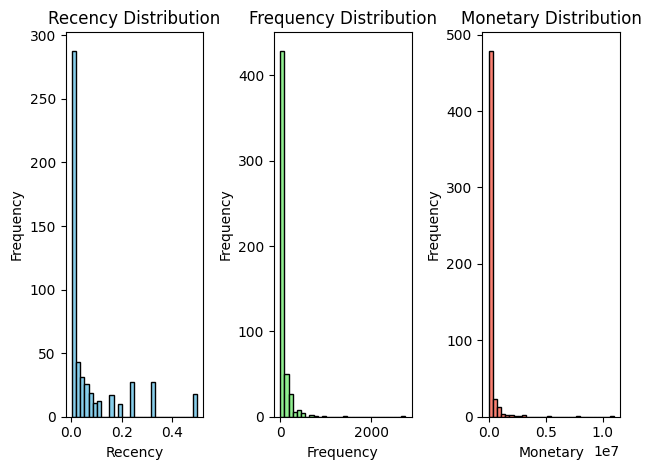

In [14]:
plt.subplot(1,3,1)
plt.hist(cust_rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(cust_rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(cust_rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

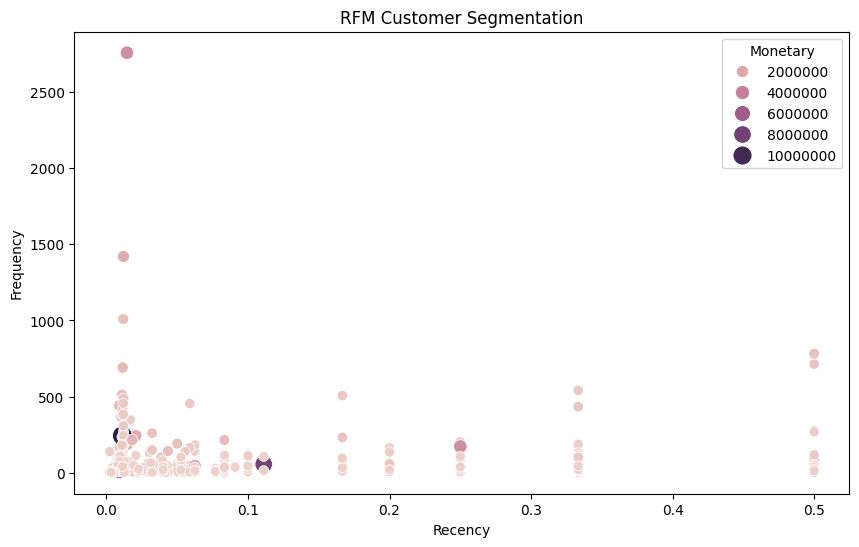

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Frequency', hue='Monetary', data=cust_rfm, size='Monetary', sizes=(50,200))
plt.title('RFM Customer Segmentation')
plt.show()

# 데이터 스케일링

In [16]:
cust_rfm_drop = cust_rfm.drop(columns='Custkey')

In [17]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [18]:
rb = PowerTransformer(method='box-cox')
mm = MinMaxScaler()
amazon_rfm_rb = pd.DataFrame(rb.fit_transform(cust_rfm_drop), columns=cust_rfm_drop.columns)
amazon_scaled = pd.DataFrame(mm.fit_transform(amazon_rfm_rb), columns=cust_rfm_drop.columns)

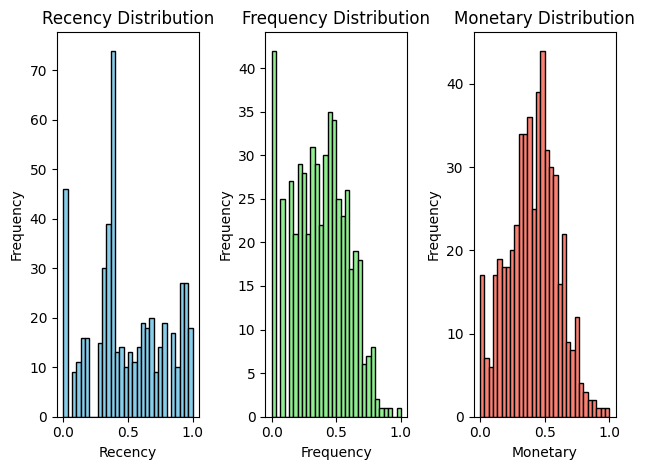

In [19]:
plt.subplot(1,3,1)
plt.hist(amazon_scaled['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_scaled['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_scaled['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

# K-Means 클러스터링

In [20]:
#!pip install yellowbrick

In [21]:
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [22]:
# kmeans = KMeans(random_state=42)
# elbow = KElbowVisualizer(kmeans, k=(1,11))
# elbow.fit(amazon_scaled)
# elbow.show()

# 엘보우: k=4

-The KElbowVisualizer also displays the amount of time to train the clustering model per "K" as a dashed green line, but is can be hidden by setting (timings=False). 
-score: SSE(Sum of Square Errors)

In [23]:
kmeans_4 = KMeans(4, random_state=42)
# visualizer = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
# visualizer.fit(amazon_scaled)
# visualizer.show()

# 실루엣 계수: k=4일 때 0.4 정도

In [24]:
k=4
kmeans_4 = KMeans(4, random_state=4)
kmeans_4.fit(amazon_scaled)
cluster = kmeans_4.labels_

In [25]:
amazon_scaled['cluster']=cluster
amazon_kmeans =amazon_scaled.copy()
amazon_kmeans

,Recency,Frequency,Monetary,cluster
0,0.001731,0.294586,0.309493,1
1,0.275898,0.376125,0.396361,2
2,0.328705,0.400348,0.538056,2
3,0.322888,0.140959,0.356128,1
4,0.682906,0.177748,0.263980,3
...,...,...,...,...
524,0.786250,0.595621,0.501626,0
525,0.376242,0.476548,0.466470,2
526,0.946318,0.485265,0.462229,0
527,0.682906,0.206249,0.234539,3


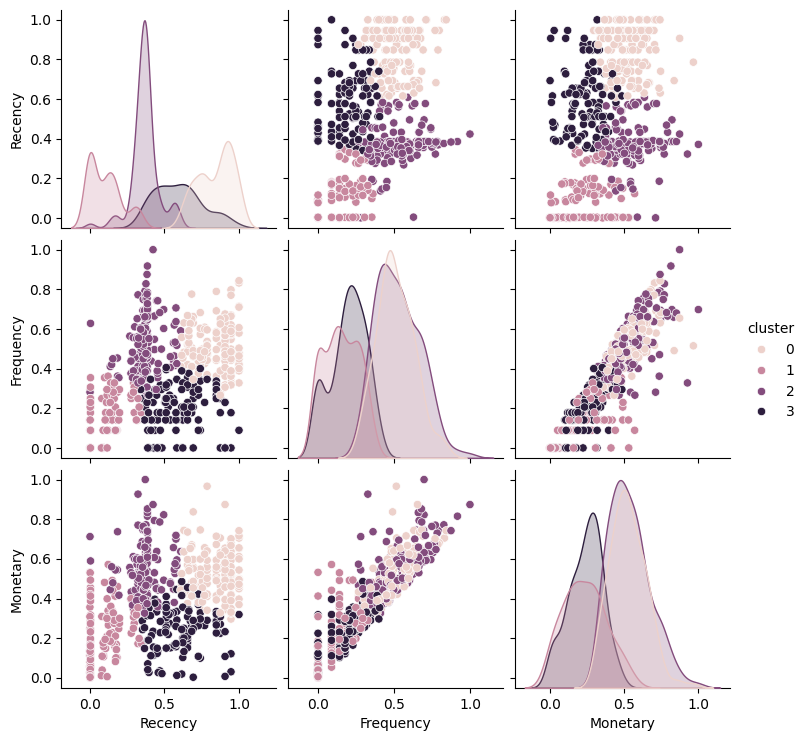

In [26]:
sns.pairplot(amazon_kmeans, hue='cluster')
plt.show()

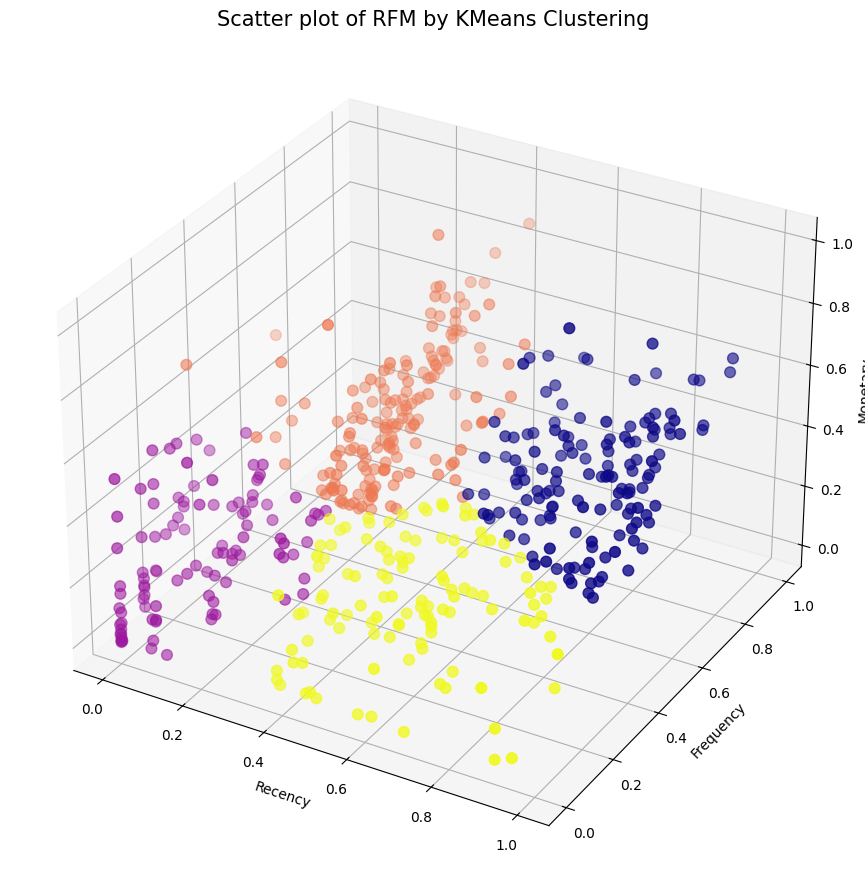

In [27]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(amazon_kmeans['Recency'], amazon_kmeans['Frequency'], amazon_kmeans['Monetary'], c=amazon_kmeans['cluster'], s=60, depthshade= True, cmap='plasma')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Scatter plot of RFM by KMeans Clustering', fontsize = 15)
plt.tight_layout()
plt.show()

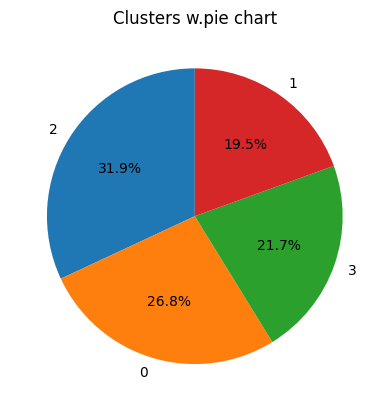

In [28]:
clusters = amazon_kmeans.cluster.value_counts()
plt.pie(clusters, labels=clusters.index, autopct='%.1f%%', startangle=90)
plt.title('Clusters w.pie chart')
plt.show()

####  R,F,M 가중치 구하기(1) - 변동계수 사용

In [29]:
#군집별 R,F,M의 평균과 표준편차 구하기 
cluster_mean = round(amazon_kmeans.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean(),2)
cluster_std = round(amazon_kmeans.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].std(),2)

In [30]:
cluster_mean

,Recency,Frequency,Monetary
cluster,,,
0,0.84,0.51,0.53
1,0.10,0.15,0.24
2,0.37,0.53,0.54
3,0.60,0.20,0.24


In [31]:
cluster_std

,Recency,Frequency,Monetary
cluster,,,
0,0.12,0.12,0.12
1,0.11,0.11,0.14
2,0.09,0.14,0.14
3,0.16,0.11,0.11


In [32]:
#변동계수(Coefficient of Variation)를 활용해 최적가중치 구하기

#Recency
cv_r0 = cluster_std.iloc[0,0]/cluster_mean.iloc[0,0]
cv_r1 = cluster_std.iloc[1,0]/cluster_mean.iloc[1,0]
cv_r2 = cluster_std.iloc[2,0]/cluster_mean.iloc[2,0]
cv_r3 = cluster_std.iloc[3,0]/cluster_mean.iloc[3,0]
#Recency의 가중평균 계산
w1 = min(cv_r0, cv_r1, cv_r2, cv_r3)/(cv_r0+cv_r1+cv_r2+cv_r3)

#Frequency
cv_f0 = cluster_std.iloc[0,1]/cluster_mean.iloc[0,1]
cv_f1 = cluster_std.iloc[1,1]/cluster_mean.iloc[1,1]
cv_f2 = cluster_std.iloc[2,1]/cluster_mean.iloc[2,1]
cv_f3 = cluster_std.iloc[3,1]/cluster_mean.iloc[3,1]
#Frequency의 가중평균 계산
w2 = min(cv_f0, cv_f1, cv_f2, cv_f3)/(cv_f0+cv_f1+cv_f2+cv_f3)

#Monetary
cv_m0 = cluster_std.iloc[0,2]/cluster_mean.iloc[0,2]
cv_m1 = cluster_std.iloc[1,2]/cluster_mean.iloc[1,2]
cv_m2 = cluster_std.iloc[2,2]/cluster_mean.iloc[2,2]
cv_m3 = cluster_std.iloc[3,2]/cluster_mean.iloc[3,2]
#Monetary의 가중평균 계산
w3 = min(cv_m0, cv_m1, cv_m2, cv_m3)/(cv_m0+cv_m1+cv_m2+cv_m3)

total_w = w1+w2+w3
w1 = round(w1/total_w, 3)
w2 = round(w2/total_w, 3)
w3 = round(w3/total_w, 3)

print(w1+w2+w3)
print(w1,w2,w3)



1.0
0.225 0.365 0.41


#### R,F,M 가중치 구하기(2) - feature importance 사용

In [33]:
# pip install lightgbm


In [34]:
from lightgbm import LGBMClassifier

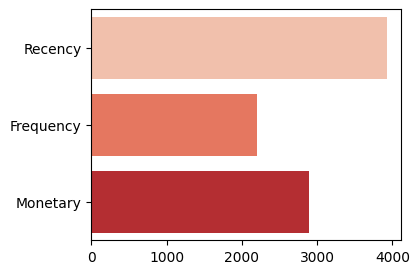

Recency: 0.43
Frequency: 0.24
Monetary: 0.32


In [35]:
X=amazon_scaled[['Recency', 'Frequency', 'Monetary']]
y=amazon_kmeans['cluster']


lgbm = LGBMClassifier(random_state=42, verbose=-1)
lgbm.fit(X,y)

plt.figure(figsize=(4,3))
sns.barplot(x=lgbm.feature_importances_, y=X.columns, palette='Reds')
plt.ylabel('')
plt.show()

#가중치 계산
scores = lgbm.feature_importances_/sum(lgbm.feature_importances_)
for i,c in enumerate(X.columns):
    print(f'{c}: {round(scores[i],2)}')

# 가중치 부여 - feature importance 확인

In [36]:
# amazon_kmeans['rfm_score'] = round((0.43*amazon_kmeans['Recency']) + (0.24*amazon_scaled['Frequency']) + (0.32*amazon_kmeans['Monetary']),4)*100

In [37]:
# amazon_kmeans['rfm_score'].value_counts().sort_index(ascending=False)

In [38]:
# amazon_kmeans

# 고객 등급 분류

diamond-platinum-gold-silver-family 순으로 높음

In [39]:
# def customer_segmentation(row):
#     if row['rfm_score'] <=40:
#         return 'family'
#     elif row['rfm_score'] <=60:
#         return 'silver'
#     elif row['rfm_score'] <=70:
#         return 'gold'
#     elif row['rfm_score'] <=80:
#         return 'platinum'
#     else:
#         return 'diamond'
    
# amazon_kmeans['Grade'] = amazon_kmeans.apply(customer_segmentation, axis=1)
# amazon_kmeans

In [40]:
# amazon_kmeans['Grade'].value_counts()

In [41]:
# round(amazon_kmeans['Grade'].value_counts(normalize=True),3)*100

# 가중치 RFM - feature importance

In [42]:
amazon_kmeans['Weighted_Recency'] = 0.43* amazon_kmeans['Recency']
amazon_kmeans['Weighted_Frequency'] = 0.24* amazon_kmeans['Frequency']
amazon_kmeans['Weighted_Monetary'] = 0.32* amazon_kmeans['Monetary']

amazon_kmeans

,Recency,Frequency,Monetary,cluster,Weighted_Recency,Weighted_Frequency,Weighted_Monetary
0,0.001731,0.294586,0.309493,1,0.000744,0.070701,0.099038
1,0.275898,0.376125,0.396361,2,0.118636,0.090270,0.126835
2,0.328705,0.400348,0.538056,2,0.141343,0.096083,0.172178
3,0.322888,0.140959,0.356128,1,0.138842,0.033830,0.113961
4,0.682906,0.177748,0.263980,3,0.293650,0.042659,0.084474
...,...,...,...,...,...,...,...
524,0.786250,0.595621,0.501626,0,0.338088,0.142949,0.160520
525,0.376242,0.476548,0.466470,2,0.161784,0.114372,0.149271
526,0.946318,0.485265,0.462229,0,0.406917,0.116464,0.147913
527,0.682906,0.206249,0.234539,3,0.293650,0.049500,0.075052


# 가중치 이후 Kmeans

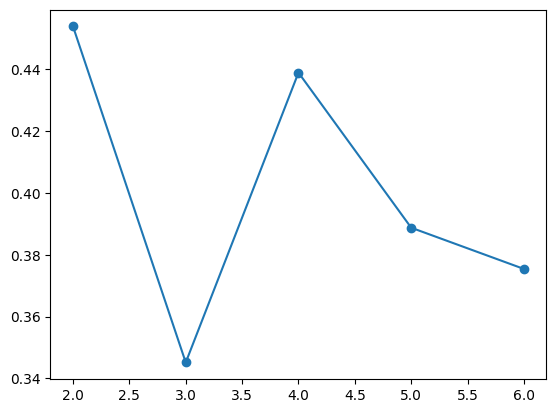

In [43]:
from sklearn.metrics import silhouette_score

features= ['Weighted_Recency', 'Weighted_Frequency', 'Weighted_Monetary']


silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(amazon_kmeans[features])
    score = silhouette_score(amazon_kmeans[features], kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 7), silhouette_scores, marker='o')

# --> 군집 4개?


In [44]:
# 실루엣 계수

kmeans_w= KMeans(n_clusters= 4, random_state= 42)
labels= kmeans_w.fit_predict(amazon_kmeans[features])
amazon_kmeans['Weighted_cluster'] = labels

silhouette= silhouette_score(amazon_kmeans[features], labels)
print(f'실루엣 계수: {round(silhouette, 2)}')

# 3일 때 35
# 4일 때 44 
# 5일 때 39


실루엣 계수: 0.44


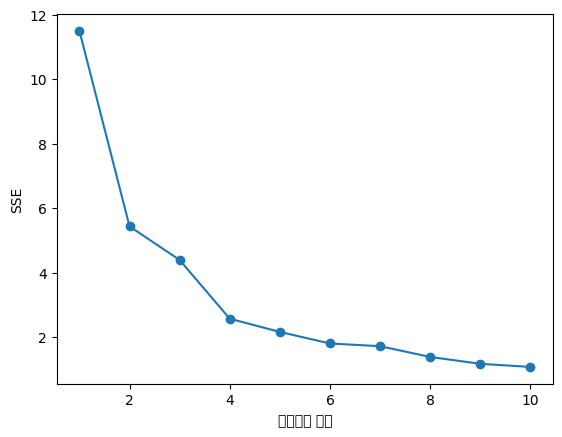

In [45]:
def elbow(X):
    sse = [] # 군집 내 거리의 합
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()

elbow(amazon_kmeans[features])

In [46]:
amazon_kmeans.head()

,Recency,Frequency,Monetary,cluster,Weighted_Recency,Weighted_Frequency,Weighted_Monetary,Weighted_cluster
0,0.001731,0.294586,0.309493,1,0.000744,0.070701,0.099038,3
1,0.275898,0.376125,0.396361,2,0.118636,0.090270,0.126835,1
2,0.328705,0.400348,0.538056,2,0.141343,0.096083,0.172178,1
3,0.322888,0.140959,0.356128,1,0.138842,0.033830,0.113961,1
4,0.682906,0.177748,0.263980,3,0.293650,0.042659,0.084474,2


In [47]:
amazon_kmeans['Weighted_cluster'].value_counts()

Weighted_cluster
1    174
0    156
2    103
3     96
Name: count, dtype: int64

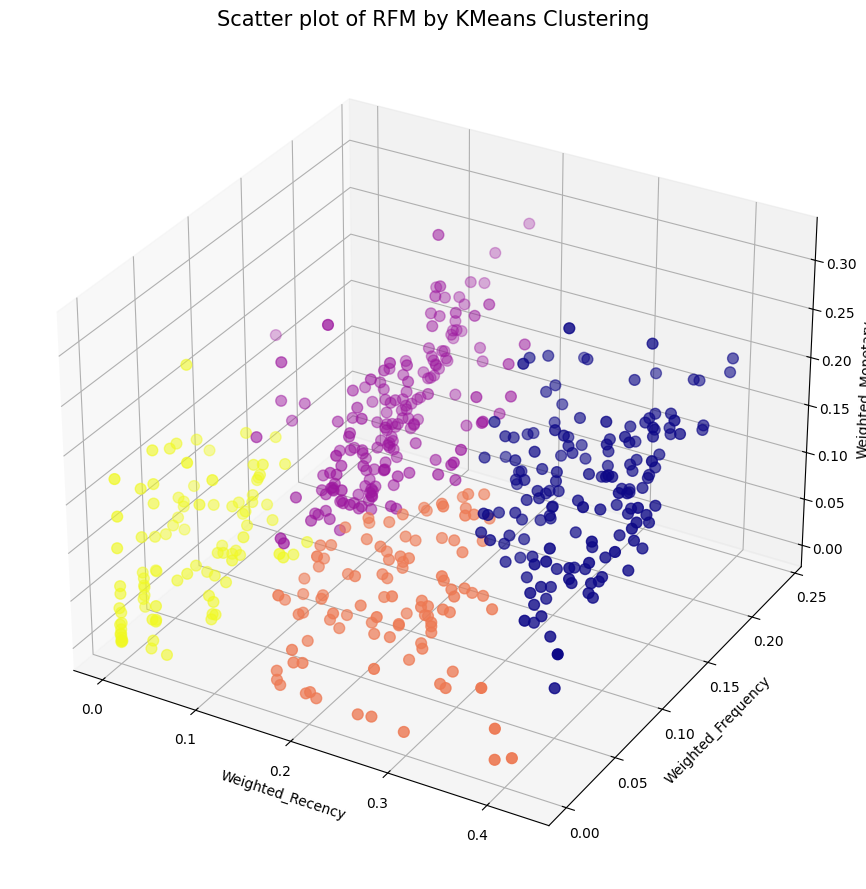

In [48]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(amazon_kmeans['Weighted_Recency'], amazon_kmeans['Weighted_Frequency'], amazon_kmeans['Weighted_Monetary'], c=amazon_kmeans['Weighted_cluster'], s=60, depthshade= True, cmap='plasma')
ax.set_xlabel('Weighted_Recency')
ax.set_ylabel('Weighted_Frequency')
ax.set_zlabel('Weighted_Monetary')
ax.set_title('Scatter plot of RFM by KMeans Clustering', fontsize = 15)
plt.tight_layout()
plt.show()

# 컬럼 이어주기 

In [49]:
amazon_rfm_cluster = pd.concat([cust_rfm, amazon_kmeans], axis=1)
amazon_rfm_cluster

amazon_rfm_cluster.columns=['Custkey', 'Recency', 'Frequency', 'Monetary', 'Recency_sc', 'Frequency_sc','Monetary_sc','cluster', 'Weighted_Recency', 'Weighted_Frequency', 'Weighted_Monetary', 'Weighted_cluster']
amazon_rfm_cluster

amazon_rfm_cluster= amazon_rfm_cluster.drop(columns= ['Recency_sc', 'Frequency_sc', 'Monetary_sc'])

category= pd.read_csv('./실프_4일차_태우님amz_category.csv')
category= category.drop(columns=['Invoice Date', 'Item Class', 'Item Number', 'Promised Delivery Date', 'U/M'])
amazon_merged= pd.merge(category, amazon_rfm_cluster, on= 'Custkey')

amazon_merged.head()

,Custkey,DateKey,Discount Amount,Invoice Number,Item,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,...,wd,weekday,Recency,Frequency,Monetary,cluster,Weighted_Recency,Weighted_Frequency,Weighted_Monetary,Weighted_cluster
0,10008602,3/21/2018,439.2400,226437,Tell Tale Summer Squash,21000,195.0000,320075,535.76,975.0000,...,2,Tue,0.5,27,70012,0,0.43,0.100958,0.160108,0
1,10008602,3/21/2018,1517.3076,226437,Nationeel Avocado Dip,13000,842.0244,320075,1850.79,3368.0976,...,2,Tue,0.5,27,70012,0,0.43,0.100958,0.160108,0
2,10014779,3/21/2018,192.4900,226451,Super White Sugar,9000,157.7600,321178,280.79,473.2800,...,2,Tue,0.5,52,67272,0,0.43,0.120845,0.158925,0
3,10014779,3/21/2018,207.3900,226451,High Top Cauliflower,8000,50.9900,321178,302.51,509.9000,...,2,Tue,0.5,52,67272,0,0.43,0.120845,0.158925,0
4,10014779,3/21/2018,510.1099,226451,Atomic Mint Chocolate Bar,12000,1254.1899,321178,744.08,1254.1899,...,2,Tue,0.5,52,67272,0,0.43,0.120845,0.158925,0


In [50]:
amazon_merged['Weighted_cluster'].value_counts()

Weighted_cluster
1    22210
0    12931
2      703
3      463
Name: count, dtype: int64

In [51]:
amazon_merged.columns

Index(['Custkey', 'DateKey', 'Discount Amount', 'Invoice Number', 'Item',
       'Line Number', 'List Price', 'Order Number', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'dk', 'Item Last', 'Category', 'wd', 'weekday', 'Recency', 'Frequency',
       'Monetary', 'cluster', 'Weighted_Recency', 'Weighted_Frequency',
       'Weighted_Monetary', 'Weighted_cluster'],
      dtype='object')

# Davies-Bouldin 점수

In [66]:
from sklearn.metrics import davies_bouldin_score


X = amazon_merged[['Weighted_Recency', 'Weighted_Frequency', 'Weighted_Monetary']]
cluster= amazon_merged['Weighted_cluster']


davies_bouldin_score(X, cluster)

np.float64(0.6245658332370987)

# 군집별 violinplot

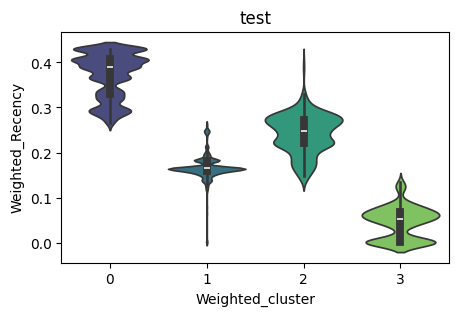

In [52]:
plt.figure(figsize=(5, 3))

sns.violinplot(data= amazon_merged, y='Weighted_Recency', x = 'Weighted_cluster', palette='viridis')

plt.title('test')
plt.xlabel('Weighted_cluster')
plt.ylabel('Weighted_Recency')
plt.show()


# 1번: 빈도, 구매금액이 큰 것에 비해 recency 점수가 낮음... 
# -> 경쟁사 등장?? 이탈 고객?
# -> 액션플랜: 1번 군집의 특성을 파악해서 1번 군집을 잡아야 한다?

# 0번: 두 번째로 빈도 높고 두 번째로 돈 많이 쓰는 군집. 제일 recency 정도가 큰 군집.
# -> 충성고객?

# 2번: recency 두 번째로 높음. 

# 3번: 금액도 적게 쓰고 빈도도 낮고 최근성도 낮음. 그냥저냥 고객....

# 군집 중요도: 1>0>2>3 

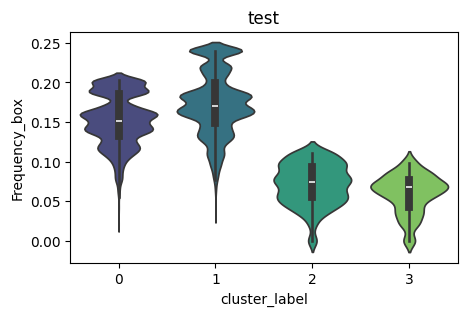

In [53]:
plt.figure(figsize=(5, 3))

sns.violinplot(data= amazon_merged, y='Weighted_Frequency', x = 'Weighted_cluster', palette='viridis')

plt.title('test')
plt.xlabel('cluster_label')
plt.ylabel('Frequency_box')
plt.show()

# 01: 비교적 더 자주 구매하는 군집 -- 1번이 제일 자주 구매함

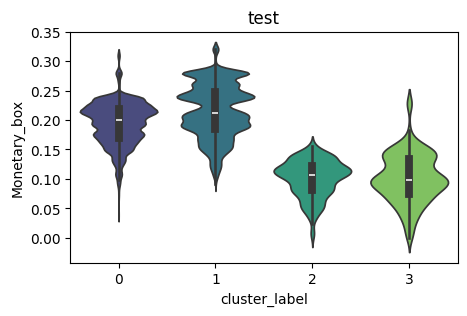

In [54]:
plt.figure(figsize=(5, 3))

sns.violinplot(data= amazon_merged, y='Weighted_Monetary', x = 'Weighted_cluster', palette='viridis')

plt.title('test')
plt.xlabel('cluster_label')
plt.ylabel('Monetary_box')
plt.show()

# 01: 비교적 돈은 더 많이 쓰는 군집 -- 1번이 제일 많이 씀

# 군집별 + 특성

In [55]:
# Quantity
print(amazon_merged[amazon_merged['Weighted_cluster'] == 1]['Sales Quantity'].mean())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 0]['Sales Quantity'].mean())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 2]['Sales Quantity'].mean())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 3]['Sales Quantity'].mean())

32.127239981990094
45.545974789266104
16.076813655761026
47.98920086393088


In [67]:
# weekday
print(amazon_merged[amazon_merged['Weighted_cluster'] == 1]['weekday'].mode())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 0]['weekday'].mode())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 2]['weekday'].mode())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 3]['weekday'].mode())

0    Mon
Name: weekday, dtype: object
0    Sun
Name: weekday, dtype: object
0    Sat
Name: weekday, dtype: object
0    Mon
Name: weekday, dtype: object


In [68]:
# Category
print(amazon_merged[amazon_merged['Weighted_cluster'] == 1]['Category'].mode())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 0]['Category'].mode())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 2]['Category'].mode())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 3]['Category'].mode())

0    Vegetable
Name: Category, dtype: object
0    Vegetable
Name: Category, dtype: object
0    Dairy
Name: Category, dtype: object
0    Dairy
Name: Category, dtype: object


In [58]:
amazon_merged.columns

Index(['Custkey', 'DateKey', 'Discount Amount', 'Invoice Number', 'Item',
       'Line Number', 'List Price', 'Order Number', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'dk', 'Item Last', 'Category', 'wd', 'weekday', 'Recency', 'Frequency',
       'Monetary', 'cluster', 'Weighted_Recency', 'Weighted_Frequency',
       'Weighted_Monetary', 'Weighted_cluster'],
      dtype='object')

In [59]:
# 할인율?
amazon_merged['discount rate'] = (amazon_merged['Sales Amount'] - amazon_merged['Discount Amount']) *100/ amazon_merged['Sales Amount']

print(amazon_merged[amazon_merged['Weighted_cluster'] == 1]['discount rate'].mean())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 0]['discount rate'].mean())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 2]['discount rate'].mean())
print(amazon_merged[amazon_merged['Weighted_cluster'] == 3]['discount rate'].mean())

16.512918435689134
20.387888438982188
27.785296178632816
24.521762102099075


In [ ]:
discount amount//Sales Amount Based on List Price * 100